# Inconsistencies of the EMT proposed by Toshmatov et al.

This worksheet is devoted to the analysis of the energy-momentum tensor presented by Toshmatov et al. for a generic regular rotating metric, in the specific case of Hayward's metric. We show that Einstein's equations are not valid on order $10^{-2}$ as claimed by the authors.
(https://journals.aps.org/prd/abstract/10.1103/PhysRevD.95.084037)

In [1]:
%display latex

## Spacetime

In [2]:
M = Manifold(4, 'M')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

The mass, angular momentum and regularization length parameters:

In [3]:
m, a, b = var('m a b', domain='real')
assume(m>0, a>=0, b>=0)
var('gam', latex_name="\gamma");

In [4]:
m = 1 # to simplify the expressions below

The metric:

In [5]:
var('Q')
g = M.lorentzian_metric('g')
MM = m*r^3/(r^3 + 2*m*b^2) 
rho2 = r^2 + (a*cos(th))^2
Delta = r^2 -(2*MM*r) + a^2
g[0,0] = -(1-(2*MM*r)/rho2)
g[0,3] = -a*(2*MM*r)*sin(th)^2/rho2
g[1,1], g[2,2] = rho2/Delta, rho2
g[3,3] = (r^2+a^2+(2*MM*r)*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

In [6]:
gm1=g.inverse()

## Electromagnetic field

We need the 1-forms $\mathrm{d}t$ and $\mathrm{d}\phi$  to form the electromagnetic field; we get them as follows:

In [7]:
X.coframe()

In [8]:
dt = X.coframe()[0]
dr = X.coframe()[1]
dtheta = X.coframe()[2]
dphi = X.coframe()[3]

The potential defined according to Eq. (25) of Toshmatov et al. (2017):

In [9]:
var('Q')
A = -Q*a*cos(th)/rho2 * dt +  Q*cos(th)*(r^2+a^2)/rho2 * dphi
A.set_name('A')
A.display()

In [10]:
F = A.exterior_derivative()
F.set_name('F')
F.display()

The electromagnetic field invariant $\mathcal{F} := F_{ab} F^{ab}$:

In [11]:
Fuu = F.up(g)
F2 = F['_ab']*Fuu['^ab']
print(F2)

Scalar field on the 4-dimensional differentiable manifold M


In [12]:
F2.display()

In [13]:
FF2=Q^2*(a^4*(3-cos(4*th))+4*(6*a^2*r^2+2*r^4+a^2*(a^2-6*r^2)*cos(2*th)))/(4*rho2^4) #result of Toshmatov et al

In [14]:
FF2.factor()

In [15]:
bool(F2.expr() == FF2) # difference between our expression and the one of Toshmatov et al.

We introduce the Lagrangian density $L(\mathcal{F})$ for the electromagnetic field as a function of $r$ and $\theta$, as Tomashtov et al. 

In [16]:
L=r^2*((15*a^4-8*a^2*r^2+8*r^4+4*a^2*(5*a^2-2*r^2)*cos(2*th)+5*a^4*cos(4*th))*diff(MM,r)+16*a^2*r*cos(th)^2*rho2*diff(MM,r,2))

Similarly, we introduce $\frac{\mathrm{d}L}{\mathrm{d}\mathcal{F}}$ as a `lambda` function, formed from the derivative of $L(x)$:

In [17]:
LF=(2*(r^2-a^2*cos(th)^2)*diff(MM,r)-r*rho2*diff(MM,r,2))/(2*Q^2)

In [18]:
#DLF=LF-(diff(L,r)*(diff(FF2,r))^(-1)+diff(L,th)*(diff(FF2,th))^(-1)) # defined as Toshmatov et al.

## Consistency checks for the lagrangian of Toshmatov et al.

In [19]:
test_r=1-1/LF*diff(L,r)*(diff(FF2,r))^(-1)
test_th=1-1/LF*diff(L,th)*(diff(FF2,th))^(-1)

In [20]:
p1=plot(test_r.subs({th:pi/2,b:1/sqrt(2),a:1/2,Q:1}),(r,0,20),axes_labels=['$r$','$X$'])

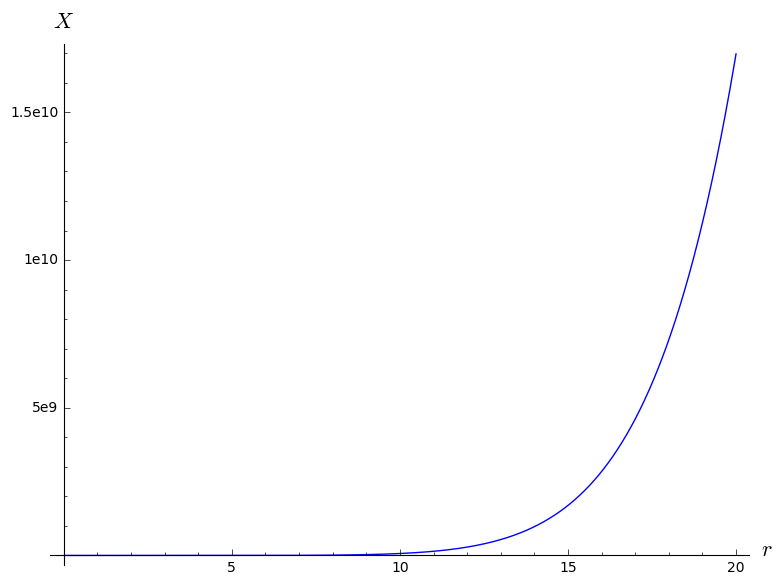

In [21]:
#p1.save('test_r.pdf')
show(p1)

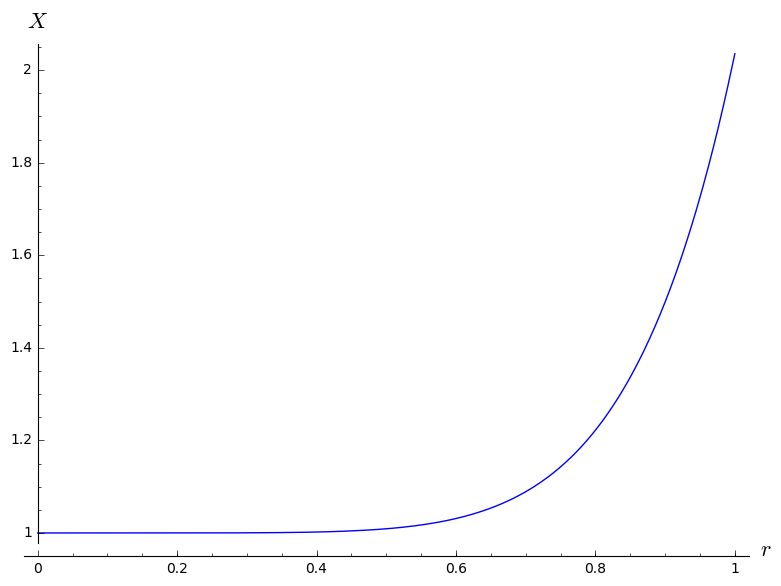

In [22]:
plot(test_r.subs({th:pi/2,b:1/sqrt(2),a:1/2,Q:1}),(r,0,1),axes_labels=['$r$','$X$'])

In [23]:
p2=plot(test_th.subs({th:pi/2.0001,b:1/sqrt(2),a:1/2,Q:1}),(r,1,20),axes_labels=['$r$','$Y$'])

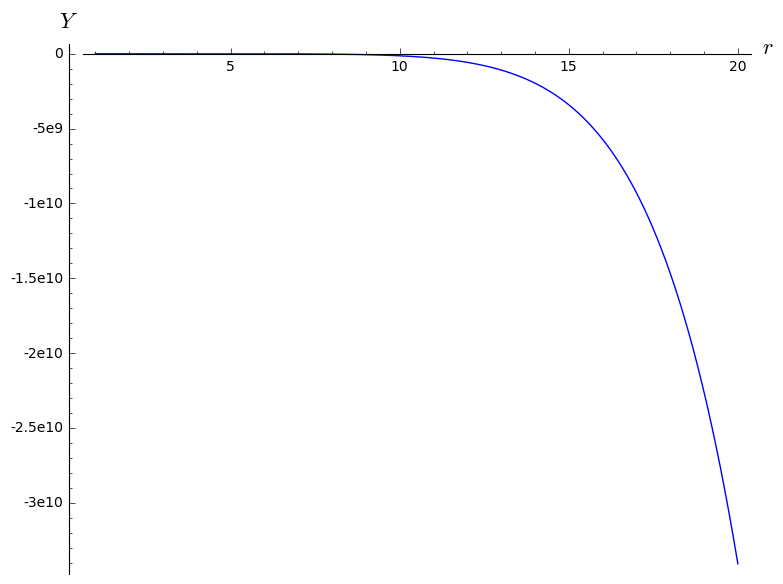

In [24]:
#p2.save('test_th.pdf')
show(p2)

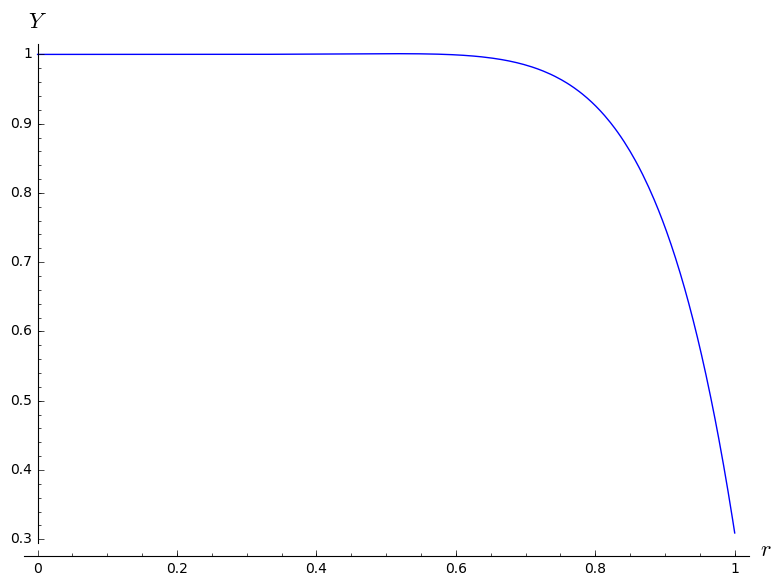

In [25]:
plot(test_th.subs({th:pi/2.0001,b:1/sqrt(2),a:1/2,Q:1}),(r,0,1),axes_labels=['$r$','$Y$'])

## Consistency checks in the case of a Maxwell field $\mathcal{L}=\mathcal{F}$

In [26]:
F2_M=F2.expr()
L_M=F2_M
LF_M=1

In [27]:
test_r_M=1-1/LF_M*diff(L_M,r)*(diff(F2_M,r))^(-1)
test_th_M=1-1/LF_M*diff(L_M,th)*(diff(F2_M,th))^(-1)

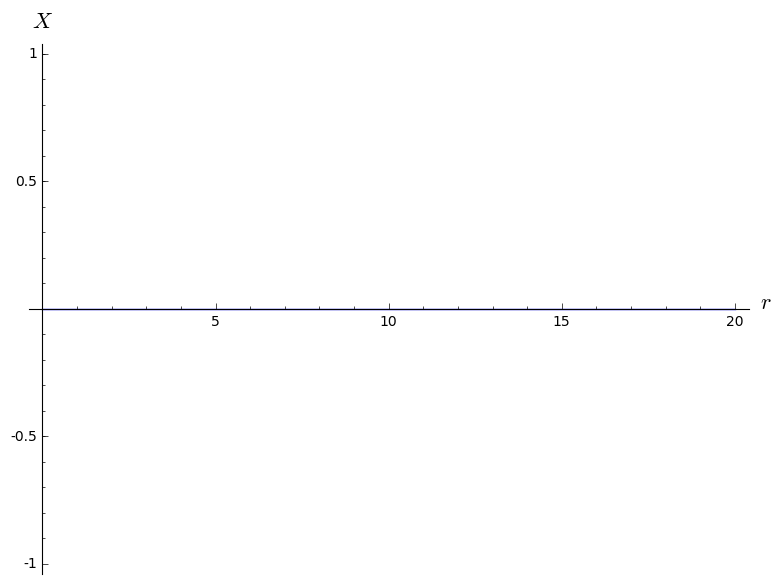

In [28]:
plot(test_r_M.subs({th:pi/2.,b:1/sqrt(2),a:1/2,Q:1}),(r,0,20),axes_labels=['$r$','$X$'])

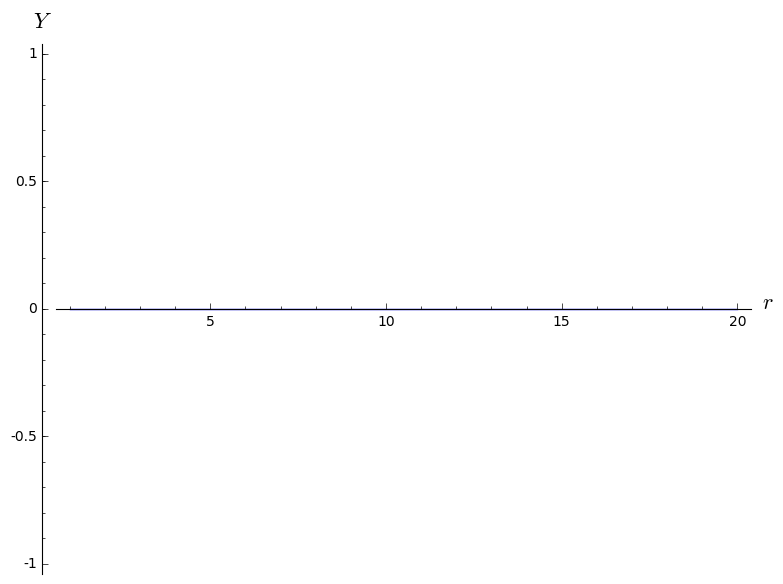

In [29]:
plot(test_th_M.subs({th:pi/2.,b:1/sqrt(2),a:1/2,Q:1}),(r,1,20),axes_labels=['$r$','$Y$'])